# Global Temperature Analysis - Visualization
Abinash Patti

### Objective
In this notebook, I will be plotting graphs and other methods of visualizations to understand the trends in the dataset.

In [2]:
# Import libraries and summary statistics
import matplotlib.pyplot as plt
import pandas as pd

## Extreme Temperatures

In [3]:
# Load extreme temperature summary
df_summary_extreme_temps = pd.read_csv("../data/analysis/ExtremeTemperaturesByCountry.csv")

# Display info and head
df_summary_extreme_temps.info()
df_summary_extreme_temps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      242 non-null    object 
 1   HottestYear  242 non-null    int64  
 2   HottestTemp  242 non-null    float64
 3   ColdestYear  242 non-null    int64  
 4   ColdestTemp  242 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.6+ KB


,Country,HottestYear,HottestTemp,ColdestYear,ColdestTemp
0,Afghanistan,1997,28.533,2008,-4.553
1,Africa,2010,27.126,1861,19.523
2,Albania,1757,25.843,1942,-2.049
3,Algeria,2003,35.829,1813,9.526
4,American Samoa,2003,28.543,1915,24.712


Text(0, 0.5, 'Country')

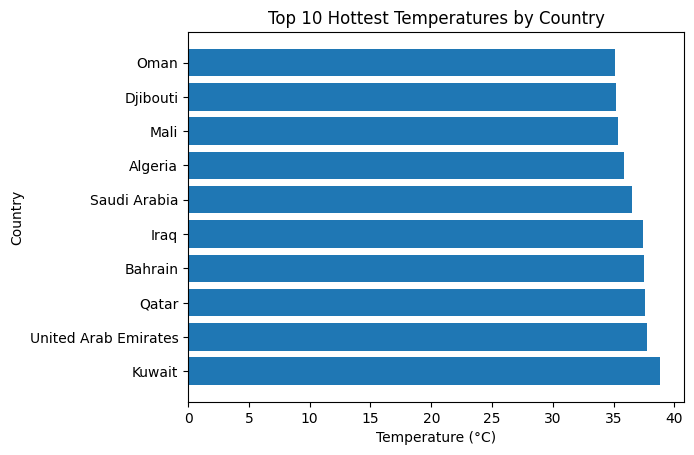

In [4]:
# Sort by hottest temp descending
df_summary_extreme_temps_sorted_top10 = df_summary_extreme_temps.sort_values(by="HottestTemp", ascending=False).head(10)

# Plot top 10 hottest temperatures by country
plt.barh(df_summary_extreme_temps_sorted_top10["Country"], df_summary_extreme_temps_sorted_top10["HottestTemp"])
plt.title("Top 10 Hottest Temperatures by Country")
plt.xlabel("Temperature (°C)")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

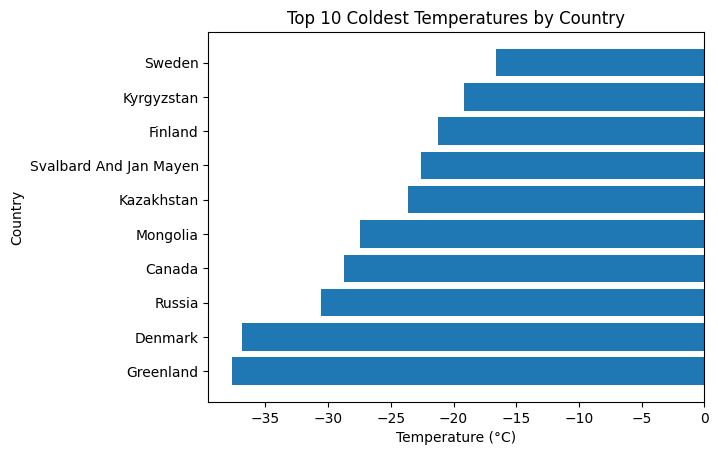

In [5]:
# Sort by coldest temp 
df_summary_extreme_temps_sorted_top10 = df_summary_extreme_temps.sort_values(by="ColdestTemp").head(10)

# Plot top 10 coldest temperatures by country
plt.barh(df_summary_extreme_temps_sorted_top10["Country"], df_summary_extreme_temps_sorted_top10["ColdestTemp"])
plt.title("Top 10 Coldest Temperatures by Country")
plt.xlabel("Temperature (°C)")
plt.ylabel("Country")

## Hottest vs Coldest Temperatures by Country

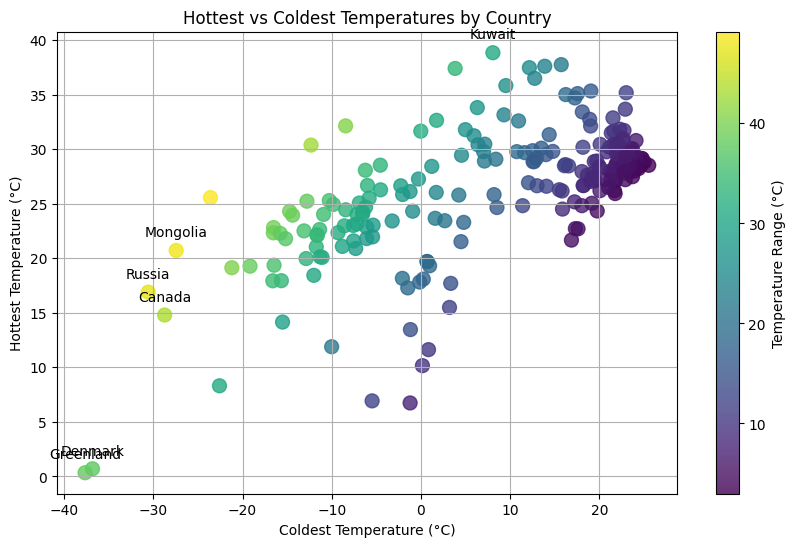

In [6]:
# Determine temperature range
df_summary_extreme_temps["TempRange"] = df_summary_extreme_temps["HottestTemp"] - df_summary_extreme_temps["ColdestTemp"]

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a scatter plot showing evey country's temperature, with a colour fo temperatre range
scatter = plt.scatter(
    df_summary_extreme_temps["ColdestTemp"], # x-axis: Country
    df_summary_extreme_temps["HottestTemp"], # y-axis: Hottest Temperature
    c=df_summary_extreme_temps["TempRange"], # colour by temperature range
    cmap='viridis', # colour map
    s=100, # size of points
    alpha=0.8 # transparency
)

# Add labels and title
plt.title("Hottest vs Coldest Temperatures by Country")
plt.xlabel("Coldest Temperature (°C)")
plt.ylabel("Hottest Temperature (°C)")
plt.grid(True)

# Add a colour bar
cbar = plt.colorbar(scatter)
cbar.set_label("Temperature Range (°C)")

# Annotate some extreme countries
for i, row in df_summary_extreme_temps.iterrows():

    # If hottest temp > 45 or coldest temp < -30, annotate
    if row["HottestTemp"] > 38 or row["ColdestTemp"] < -25:
        plt.annotate(row["Country"], (row["ColdestTemp"], row["HottestTemp"]), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

The above graph displays all countries as points on a scatter plot based on their hottest (y-axis) and coldest temperatures (x-axis). The brighter the colour of the point, the larger the temperature range of the country.

As can be seen, most countries have relatively stable temperatures and sit around the 20-25°C mark.

## Global Average Temperature Over Time

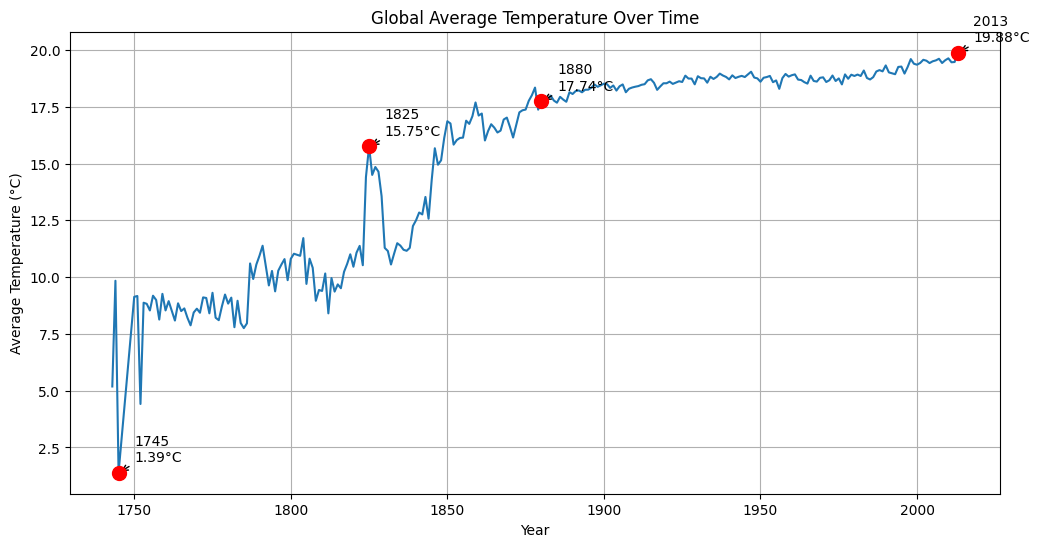

In [ ]:
# Read yearly global average temperatures CSV into DataFrame
df_yearly_global_avg = pd.read_csv("../data/analysis/YearlyGlobalAverageTemperatures.csv")

# Create a line plot of yearly global average temperatures over time
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_global_avg["Year"], df_yearly_global_avg["AverageTemperature"])
plt.title("Global Average Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)

# Put emphasis on key years (spikes seen in the graph)
key_years = [1745, 1825, 1880, 2013]
for year in key_years:
    temp = df_yearly_global_avg[df_yearly_global_avg["Year"] == year]["AverageTemperature"].values[0]
    plt.scatter(year, temp, color="red", s=100, zorder=5) # red dot for emphasis
    plt.annotate(f"{year}\n{temp:.2f}°C", xy=(year, temp), xytext=(year+5, temp+0.5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

plt.show()

This chart shows the global average temperature over the years according to the dataset. There is a clear upwards trend, proving that global warming is indeed occuring. 

We can see that there are big spikes in both directions in the historical data. This makes sense as those records are not entirely accurate and don't contain data from all countries. Around 1880 is when the data started to become more consistent, and it has been an almost linear slight increase in temperature from that point onwards. 

### Key Points
**1745**: There is a big downwards spike here. Likely due to a lack of data collection as historical records are sparse and may not contain countries from every region. 

**1825**: There is a big spike upwards. Likely due to a lack of data collection as historical records are sparse and may not contain countries from every region.

**1880**: The graph begins to get consistent, indicating that the data is accurate.

**2013**: The final year of data in this dataset.

- From 1880 to 2013, the global average temperature has increased by 2°C (according to the dataset).
- The sudden spikes are likely due to incomplete data but may have also been influenced by solar cycles, volcanic eruptions, etc.
- As the dataset is biased towards Europe and North America at that time, these events significantly impact "global" figures.

*Note*: This dataset stops at 2013, but more recent data has shown that the global warming trend continues at a similar rate.


## Countries That Defy Global Warming

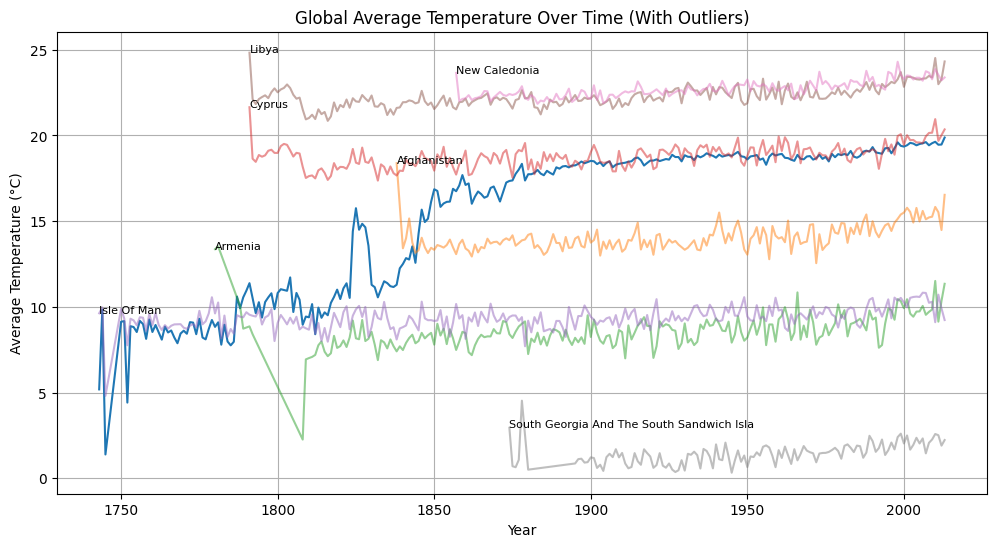

In [26]:
# Create a line plot of yearly global average temperatures over time
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_global_avg["Year"], df_yearly_global_avg["AverageTemperature"])
plt.title("Global Average Temperature Over Time (With Outliers)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)

# Read yearly country average temperatures CSV into DataFrame
df_yearly_country_avg = pd.read_csv("../data/analysis/YearlyCountryAverageTemperatures.csv")

# Read cooling countries data from CSV into DataFrame
df_cooling_countries = pd.read_csv("../data/analysis/CoolingCountries.csv")

# Add lines for cooling countries on plot
for index, row in df_cooling_countries.iterrows():
    # Get data for the specific country
    country_data = df_yearly_country_avg[df_yearly_country_avg["Country"] == row["Country"]]
    # Plot the country's temperature trend
    plt.plot(country_data["Year"], country_data["AverageTemperature"], label=row["Country"], alpha=0.5)

    # Add text annotation for the country at the start of the line
    plt.text(country_data["Year"].iloc[0], country_data["AverageTemperature"].iloc[0], row["Country"], fontsize=8)

plt.show()

This chart shows the global average temperature over the years according to the dataset with the outliers. There is a clear upwards trend, proving that global warming is indeed occuring. The outliers are the countries that have had a negative change in temperature and have actually gotten cooler while the rest of the world has gotten warmer, according to the dataset.

### Key Points

This visualization confirms my inference about the dataset starting with very few countries; these countries are in Europe and North America. Isle of Man (located in Europe) mirrors the start of the data set, whereas the other nations are only added later on.

It can be seen that most of these outliers have had a sharp drop in temperature in the first year of recording, making me question if they actually defy global warming. These large downwards spikes signify that the first temperature reading was actually very high compared to the country's average over a longer time frame, influencing the average temperature change. For example, an initial reading of 22°C for Cyprus, which was 4°C higher than the next few years, makes it seem like today's temperature is actually lower than what it was. However, if we take the more conistent temperature of 18°C, it has risen similarly to the global average.

*To put it simply*: For all the outliers, look at their lines at the point the spikes get consistent (showcasing accurate data reporting) and compare them to today's temperature - they have all gotten warmer!

In conclusion, I highly doubt that these countries have actually gotten cooler and defied global warming; it is simply a result of incorrect temperature reporting in the dataset. **GLOBAL WARMING IS REAL AND IT'S TRULY *GLOBAL*!!!**